In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(123)
n_samples=1000
class_0_ratio=0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0
print(n_class_0,n_class_1)


900 100


In [63]:
# Create Dataset with Imbalanced Dataset
class_0=pd.DataFrame({
    'featue1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
sns.histplot(class_0,kde=True)
class_1=pd.DataFrame({
    'featue1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})
# not working below
# class_0.top()
class_0['featue1']
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df

df['target'].value_counts()
# sns.histplot(df)

target
0    900
1    100
Name: count, dtype: int64

<Axes: ylabel='Count'>

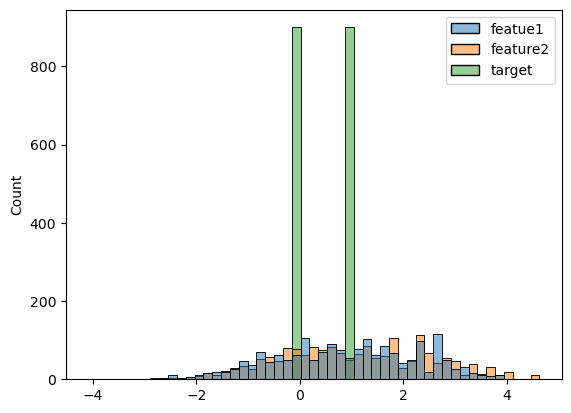

In [72]:
from sklearn.utils import resample
# Now we will do upsampling of 1-100
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
# df_minority_upsample.shape
df_upsampled=pd.concat([df_majority,df_minority_upsample])
df_upsampled['target'].value_counts()
sns.histplot(df_upsampled)

DOWN SAMPLING


In [3]:
class_0=pd.DataFrame({
    'featue1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'featue1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})
# not working below
# class_0.head()
class_0['featue1']
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df

df['target'].value_counts()

,featue1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


<Axes: ylabel='Count'>

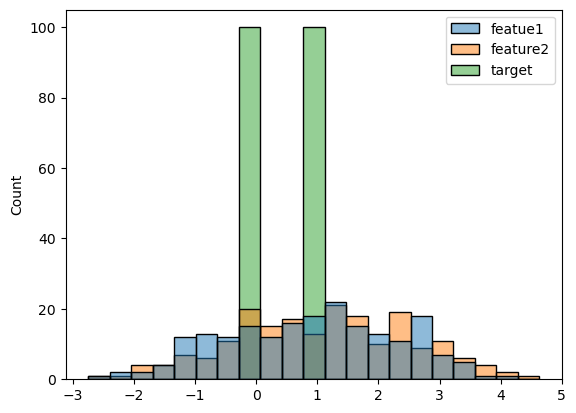

In [77]:
df_majority_downscale=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
df_downsampled=pd.concat([df_minority,df_majority_downscale])
df_downsampled['target'].value_counts()
sns.histplot(df_downsampled)

#############################SMOTE


(1000, 2)
           f1        f2
0   -0.762898 -0.706808
1   -1.075436 -1.051162
2   -0.610115 -0.909802
3   -2.023284 -0.428945
4   -0.812921 -1.316206
..        ...       ...
995 -0.712495 -0.880452
996 -2.625830 -2.827891
997 -1.326439 -1.815178
998 -0.833486 -0.514647
999 -0.302876 -0.575975

[1000 rows x 2 columns]
     target
0         0
1         0
2         0
3         1
4         0
..      ...
995       0
996       0
997       0
998       0
999       0

[1000 rows x 1 columns]


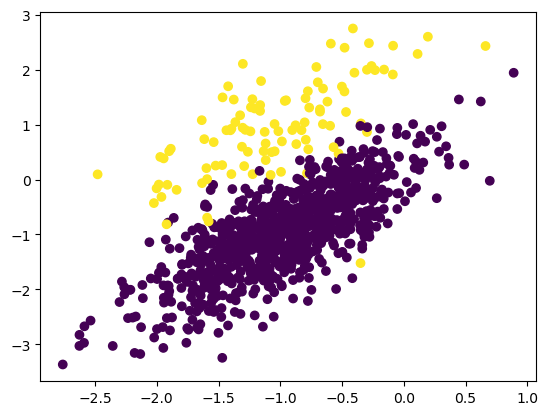

In [47]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)
make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)
print(x.shape)

# print(x[:, 0])
# plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', alpha=0.7)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")

df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
print(df1)
print(df2)

import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

Text(0, 0.5, 'Feature 2')

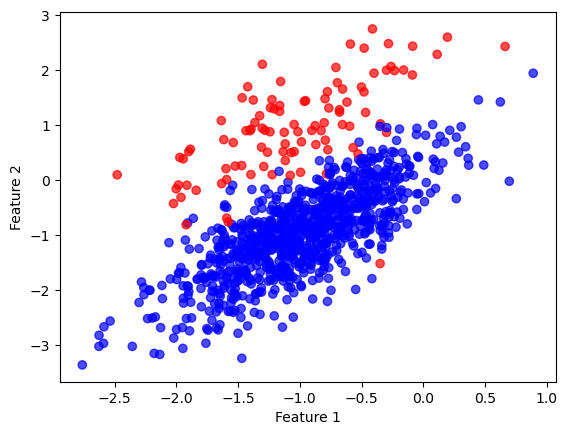

In [50]:
# above and below both are same
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
!pip install imblearn


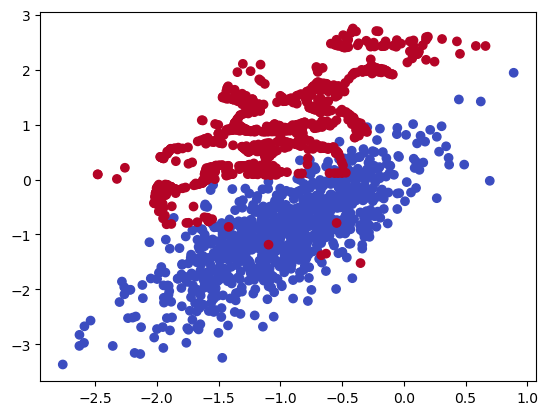

In [59]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])
x.shape
y.shape
plt.scatter(x['f1'],x['f2'],c=y,cmap='coolwarm')

